In [1]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install networkx

Note: you may need to restart the kernel to use updated packages.


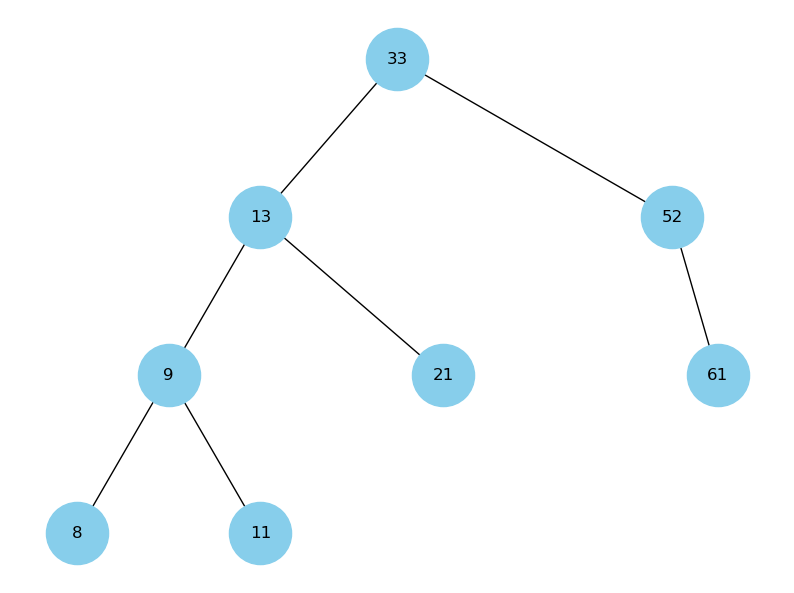

In [18]:
"""
Árvores
            
        Tipos de Árvores

            Árvore Binária de Busca (ABB)
            
Uma Árvore Binária de Busca (ABB) é uma árvore binária em que cada nó tem um valor 
e dois ponteiros de filho, esquerdo e direito, e assegura as seguintes propriedades:

    - O valor no nó à esquerda é sempre menor do que o valor do nó pai.
    - O valor no nó à direita é sempre maior do que o valor do nó pai.

Isso permite uma busca eficiente, já que podemos ignorar metade
da árvore durante a busca.

A seguir, um exemplo de uma Árvore Binária de 
Busca (ABB) que inclui inserção, exclusão, alteração e pesquisa:

"""

# Importando o módulo "tkinter" e dando a ele o alias "tk".
# "tkinter" é uma biblioteca padrão para criar interfaces gráficas no Python.
import tkinter as tk

# Importando algumas classes específicas de "tkinter":
# "ttk" oferece acesso a um conjunto de widgets temáticos que podem 
# ser usados para construir GUIs.
# "messagebox" é usado para exibir caixas de mensagem.
from tkinter import ttk, messagebox

# Importando o módulo "networkx" com alias "nx".
# "networkx" é uma biblioteca para a criação, manipulação e estudo de redes e grafos complexos.
import networkx as nx

# Importando o módulo "pyplot" de "matplotlib" e dando a ele o alias "plt".
# "matplotlib" é uma biblioteca para criação de gráficos e visualizações em Python.
# "pyplot" é um módulo em "matplotlib" que oferece uma interface para plotagem no estilo MATLAB.
import matplotlib.pyplot as plt

# Importando "FigureCanvasTkAgg" do backend "backend_tkagg" de "matplotlib".
# Este é usado para integrar gráficos do matplotlib em aplicações baseadas em tkinter.
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg


# Definindo uma classe chamada "No".
# Esta classe representa um nó de uma árvore binária.
class No:

    # Construtor da classe. É chamado quando um objeto desta classe é instanciado.
    def __init__(self, valor):
        
        # Inicializando o atributo "valor" do objeto com o valor passado como
        # argumento para o construtor.
        self.valor = valor
        
        # Inicializando o atributo "esquerdo" do objeto com None.
        # Isso representa a referência ao filho esquerdo do nó, que 
        # inicialmente é nulo (não existe).
        self.esquerdo = None
        
        # Inicializando o atributo "direito" do objeto com None.
        # Isso representa a referência ao filho direito do nó, que inicialmente é 
        # nulo (não existe).
        self.direito = None
        

# Definindo uma classe chamada "ABB" que representa uma Árvore Binária de Busca.
class ABB:

    # Construtor da classe. É chamado quando um objeto desta classe é instanciado.
    def __init__(self):
        
        # Inicializando o atributo "raiz" do objeto com None.
        # A raiz é o nó superior de uma árvore e, inicialmente, a árvore está 
        # vazia (não tem raiz).
        self.raiz = None

    # Método para inserir um valor na árvore.
    def inserir(self, valor):
        
        # Verificando se a árvore está vazia (não possui uma raiz).
        if self.raiz is None:
            
            # Se a árvore está vazia, o novo valor se tornará a raiz da árvore.
            self.raiz = No(valor)
            
        else:
            
            # Se a árvore já tem uma raiz, usamos um método recursivo privado para 
            # inserir o valor
            # na posição correta (esquerda ou direita) na árvore.
            self._inserir_recursivo(self.raiz, valor)


    # Definindo um método privado para inserção recursiva.
    # A convenção de nome "_nome_do_método" indica que o método é de uso 
    # interno da classe (private).
    
    def _inserir_recursivo(self, no_atual, valor):

        # Verifica se o valor a ser inserido é menor do que o valor do nó atual.
        if valor < no_atual.valor:

            # Se o valor é menor, então ele deve ser inserido à esquerda.

            # Verifica se o nó esquerdo do nó atual está vazio (None).
            if no_atual.esquerdo is None:

                # Se estiver vazio, cria um novo nó com o valor e o coloca como 
                # filho esquerdo do nó atual.
                no_atual.esquerdo = No(valor)
                
            else:
                
                # Se o nó esquerdo já tem um valor, então a função é chamada recursivamente 
                # para tentar inserir o valor no subnó esquerdo do nó atual.
                self._inserir_recursivo(no_atual.esquerdo, valor)
                
        else:
            
            # Se o valor não for menor (ou seja, for maior ou igual), ele deve 
            # ser inserido à direita.

            # Verifica se o nó direito do nó atual está vazio (None).
            if no_atual.direito is None:

                # Se estiver vazio, cria um novo nó com o valor e o coloca como 
                # filho direito do nó atual.
                no_atual.direito = No(valor)
                
            else:
                
                # Se o nó direito já tem um valor, então a função é chamada recursivamente 
                # para tentar inserir o valor no subnó direito do nó atual.
                self._inserir_recursivo(no_atual.direito, valor)
                
    
    # Definindo um método para calcular o tamanho da subárvore.
    def tamanho_da_subarvore(self, no):

        # Verifica se o nó atual é None (ou seja, se está vazio).
        if no is None:

            # Se o nó estiver vazio, retorna 0 (pois não há elementos nesta subárvore).
            return 0

        # Retorna a soma de:
        # 1 (para o nó atual) 
        # + o tamanho da subárvore à esquerda (chamando a função recursivamente para o nó esquerdo)
        # + o tamanho da subárvore à direita (chamando a função recursivamente para o nó direito).
        return 1 + self.tamanho_da_subarvore(no.esquerdo) + self.tamanho_da_subarvore(no.direito)
      
    
    # Define um método para calcular as posições dos nós na visualização da árvore.
    def calcular_posicoes(self, no, profundidade=0, posicao=0, posicoes=None, deslocamento=1.5):

        # Se 'posicoes' não foi inicializado (ou seja, é None), 
        # inicia como um dicionário vazio. 
        # 'posicoes' armazenará as coordenadas x, y de cada nó.
        if posicoes is None:
            posicoes = {}

        # Se o nó atual não está vazio.
        if no:

            # Atribui a posição (x, y) do nó atual.
            # A posição y é negativa para mover os nós descendentes para baixo na visualização.
            posicoes[no.valor] = (posicao, -profundidade)

            # Calcula o tamanho da subárvore esquerda do nó atual. 
            # Isso ajudará a determinar quanto espaço é necessário para a subárvore à esquerda.
            deslocamento_esquerdo = self.tamanho_da_subarvore(no.esquerdo)

            # Calcula o tamanho da subárvore direita do nó atual.
            deslocamento_direito = self.tamanho_da_subarvore(no.direito)

            # Se o nó atual possui um filho à esquerda.
            if no.esquerdo:

                # Calcula as posições para a subárvore esquerda usando uma chamada recursiva.
                # Aumenta a profundidade (para mover para o próximo nível da árvore) e ajusta a posição x.
                posicoes = self.calcular_posicoes(no.esquerdo, profundidade+1, posicao-deslocamento*(deslocamento_direito+1), posicoes)

            # Se o nó atual possui um filho à direita.
            if no.direito:

                # Calcula as posições para a subárvore direita usando uma chamada recursiva.
                # Ajusta a posição x para garantir que a subárvore direita esteja posicionada corretamente.
                posicoes = self.calcular_posicoes(no.direito, profundidade+1, posicao+deslocamento*(deslocamento_esquerdo+1), posicoes)

        # Retorna o dicionário contendo as posições dos nós.
        return posicoes


            
    # Define um método para criar um grafo direcionado representando a árvore.
    def criar_grafo(self, no_atual=None, G=None):

        # Se o grafo 'G' não foi inicializado (ou seja, é None), 
        # cria uma nova instância do grafo direcionado usando a biblioteca NetworkX.
        if G is None:
            G = nx.DiGraph()

        # Se o nó atual não está vazio.
        if no_atual:

            # Se o nó atual possui um filho à esquerda.
            if no_atual.esquerdo:

                # Adiciona uma aresta ao grafo entre o nó atual e seu filho esquerdo.
                G.add_edge(no_atual.valor, no_atual.esquerdo.valor)

                # Chamada recursiva para adicionar nós e arestas da subárvore esquerda ao grafo.
                self.criar_grafo(no_atual.esquerdo, G)

            # Se o nó atual possui um filho à direita.
            if no_atual.direito:

                # Adiciona uma aresta ao grafo entre o nó atual e seu filho direito.
                G.add_edge(no_atual.valor, no_atual.direito.valor)

                # Chamada recursiva para adicionar nós e arestas da subárvore direita ao grafo.
                self.criar_grafo(no_atual.direito, G)

        # Retorna o grafo preenchido.
        return G
    
    
    
                
                
# Define uma classe para criar uma interface gráfica para uma 
# Árvore Binária de Busca (ABB).
class InterfaceABB:
    
    # Método inicializador da classe.
    def __init__(self, janela_principal):
        
        # Atribui a janela principal passada como argumento para o atributo da classe 'janela'.
        self.janela = janela_principal
        
        # Define o título da janela principal.
        self.janela.title("Interface Gráfica para ABB")

        # Cria uma nova instância da Árvore Binária de Busca (ABB) que será usada na interface.
        self.arvore = ABB()

        # Cria um frame (quadro/contêiner) para conter os widgets relacionados à 
        # inserção, exclusão e atualização de nós.
        frame_entrada = ttk.Frame(janela_principal)
        
        # Posiciona o frame na janela principal com um espaçamento (padding) de 20 pixels verticalmente e horizontalmente.
        # O frame expandirá na direção horizontal para preencher o espaço disponível (fill=tk.X).
        frame_entrada.pack(pady=20, padx=20, fill=tk.X)
        
        # Seção para criar e posicionar componentes relacionados à inserção na interface.

        # Cria uma label (etiqueta) com o texto "Valor:" no frame de entrada.
        ttk.Label(frame_entrada, text="Valor:", font="Arial 16").grid(row=0, column=0, padx=10, pady=5, sticky=tk.W)
        
        # Cria um campo de entrada (Entry) onde os usuários podem inserir valores e o atribui ao atributo 'campo_valor'.
        self.campo_valor = ttk.Entry(frame_entrada, font="Arial 16")
        
        # Posiciona o campo de entrada na primeira linha e segunda coluna do layout grid do frame de entrada.
        self.campo_valor.grid(row=0, column=1, padx=10, pady=5, sticky=tk.EW)
        
        # Cria um botão com o texto "Inserir", que quando pressionado, chama o método 'adicionar_valor'.
        self.botao_inserir = ttk.Button(frame_entrada,
                                        text="Inserir", 
                                        command=self.adicionar_valor)
        
        # Posiciona o botão na primeira linha e terceira coluna do layout grid do frame de entrada.
        self.botao_inserir.grid(row=0, column=2, padx=10, pady=5)
        
        
        # Seção para configurar a área de desenho do Matplotlib.

        # Cria uma figura e eixo do Matplotlib com um tamanho especificado.
        # Esta será a área onde a Árvore Binária de Busca será desenhada.
        self.figura, self.eixo = plt.subplots(figsize=(10, 8))
        
        # Cria um canvas (área de desenho) do Matplotlib para ser incorporado na janela principal do tkinter.
        # 'FigureCanvasTkAgg' é a classe que permite a integração do Matplotlib com o tkinter.
        self.canvas = FigureCanvasTkAgg(self.figura, janela_principal)
        
        # Incorpora o canvas criado na janela principal do tkinter, garantindo que ele seja apresentado ao usuário.
        # Ajusta o padding vertical para 10 pixels.
        self.canvas.get_tk_widget().pack(pady=10)
        
        
    # Início da definição da função que manipula a adição de um valor à árvore.
    def adicionar_valor(self):
        

        # Tentativa de executar o bloco de código a seguir.
        try:
            
            # Obtém o valor digitado pelo usuário no campo 'campo_valor', tenta convertê-lo em um inteiro 
            # e atribui à variável 'valor'.
            valor = int(self.campo_valor.get())

            # Usa o método 'inserir' da árvore (instância da classe ABB) para inserir o valor obtido.
            self.arvore.inserir(valor)

            # Atualiza a representação visual da árvore.
            self.atualizar_desenho()

            # Limpa o campo de entrada 'campo_valor', removendo todo o conteúdo que o usuário digitou.
            self.campo_valor.delete(0, tk.END)
            

        # Caso ocorra um erro ao tentar converter o valor digitado em um número inteiro (ValueError).
        except ValueError:
            
            # Exibe uma janela de erro com o título "Erro" e a mensagem "Por favor, insira um número válido."
            messagebox.showerror("Erro", "Por favor, insira um número válido.")
            
            
    # Início da definição da função responsável por atualizar o desenho da
    # Árvore Binária de Busca (ABB) na interface.
    def atualizar_desenho(self):

        # Limpa o conteúdo atual do eixo. Essa ação é necessária para 
        # garantir que desenhos anteriores da árvore sejam removidos 
        # e possamos começar a desenhar a árvore atualizada a partir de uma tela em branco.
        self.eixo.clear()

        # Chama a função 'criar_grafo' da instância da classe ABB (representando 
        # a árvore) com a raiz da árvore como argumento. 
        # Esta função transforma a árvore em um grafo que pode ser desenhado.
        grafo = self.arvore.criar_grafo(self.arvore.raiz)

        # Chama a função 'calcular_posicoes' da instância da classe ABB 
        # para determinar as posições onde os nós da árvore 
        # devem ser desenhados. Esta função retorna um dicionário
        # mapeando cada nó para sua posição.
        posicoes = self.arvore.calcular_posicoes(self.arvore.raiz)

        # Utiliza a função 'draw' do pacote NetworkX para desenhar o grafo (representando
        # a ABB) nas posições calculadas.
        # Algumas características de como o grafo será desenhado são
        # definidas pelos argumentos, tais como:
        # - 'with_labels=True': Mostra os rótulos (valores) nos nós.
        # - 'arrows=False': Não mostra setas (pois é uma ABB e não um grafo direcionado padrão).
        # - 'node_size=2000': Define o tamanho dos nós.
        # - 'node_color='skyblue'': Define a cor dos nós como azul celeste.
        # - 'ax=self.eixo': Determina que o desenho será feito no eixo atual.
        nx.draw(grafo, posicoes, with_labels=True, arrows=False, node_size=2000, node_color='skyblue', ax=self.eixo)

        # Atualiza o canvas (área de desenho) para refletir as mudanças feitas no eixo.
        self.canvas.draw()

# Verifica se este script está sendo executado diretamente (não importado como um módulo).
if __name__ == "__main__":

    # Cria uma instância da janela principal da biblioteca tkinter.
    janela = tk.Tk()

    # Cria uma instância da classe InterfaceABB, passando a janela recém-criada como argumento.
    # Isso inicializa a interface da Árvore Binária de Busca (ABB) dentro da janela.
    app = InterfaceABB(janela)

    # Inicia o loop principal da janela tkinter.
    # Isso fará com que a janela continue rodando e respondendo a eventos até que o usuário a feche.
    janela.mainloop()

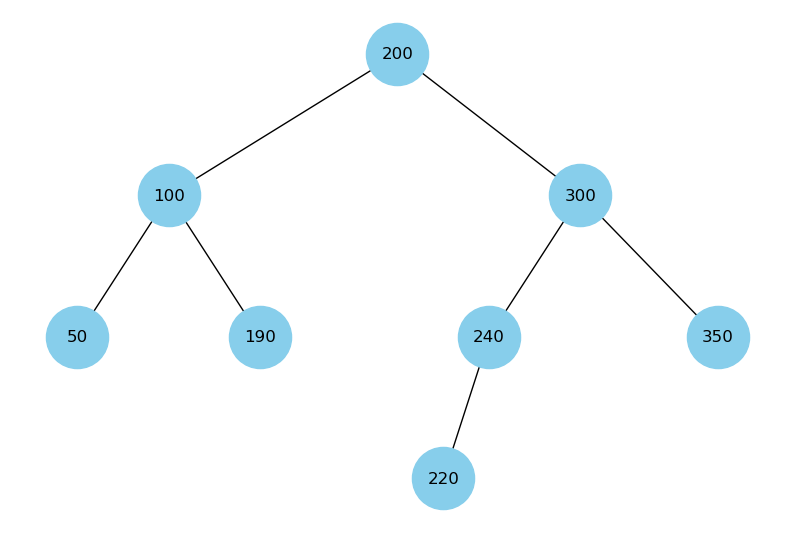

In [4]:
"""
Árvores
            
        Tipos de Árvores

            Árvore Binária de Busca (ABB)
            
Uma Árvore Binária de Busca (ABB) é uma árvore binária em que cada nó tem um valor 
e dois ponteiros de filho, esquerdo e direito, e assegura as seguintes propriedades:

    - O valor no nó à esquerda é sempre menor do que o valor do nó pai.
    - O valor no nó à direita é sempre maior do que o valor do nó pai.

Isso permite uma busca eficiente, já que podemos ignorar metade
da árvore durante a busca.

A seguir, um exemplo de uma Árvore Binária de 
Busca (ABB) que inclui inserção, exclusão, alteração e pesquisa:

"""

# Importando o módulo "tkinter" e dando a ele o alias "tk".
# "tkinter" é uma biblioteca padrão para criar interfaces gráficas no Python.
import tkinter as tk

# Importando algumas classes específicas de "tkinter":
# "ttk" oferece acesso a um conjunto de widgets temáticos que podem 
# ser usados para construir GUIs.
# "messagebox" é usado para exibir caixas de mensagem.
from tkinter import ttk, messagebox

# Importando o módulo "networkx" com alias "nx".
# "networkx" é uma biblioteca para a criação, manipulação e estudo de redes e grafos complexos.
import networkx as nx

# Importando o módulo "pyplot" de "matplotlib" e dando a ele o alias "plt".
# "matplotlib" é uma biblioteca para criação de gráficos e visualizações em Python.
# "pyplot" é um módulo em "matplotlib" que oferece uma interface para plotagem no estilo MATLAB.
import matplotlib.pyplot as plt

# Importando "FigureCanvasTkAgg" do backend "backend_tkagg" de "matplotlib".
# Este é usado para integrar gráficos do matplotlib em aplicações baseadas em tkinter.
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg


# Definindo uma classe chamada "No".
# Esta classe representa um nó de uma árvore binária.
class No:

    # Construtor da classe. É chamado quando um objeto desta classe é instanciado.
    def __init__(self, valor):
        
        # Inicializando o atributo "valor" do objeto com o valor passado como
        # argumento para o construtor.
        self.valor = valor
        
        # Inicializando o atributo "esquerdo" do objeto com None.
        # Isso representa a referência ao filho esquerdo do nó, que 
        # inicialmente é nulo (não existe).
        self.esquerdo = None
        
        # Inicializando o atributo "direito" do objeto com None.
        # Isso representa a referência ao filho direito do nó, que inicialmente é 
        # nulo (não existe).
        self.direito = None
        

# Definindo uma classe chamada "ABB" que representa uma Árvore Binária de Busca.
class ABB:

    # Construtor da classe. É chamado quando um objeto desta classe é instanciado.
    def __init__(self):
        
        # Inicializando o atributo "raiz" do objeto com None.
        # A raiz é o nó superior de uma árvore e, inicialmente, a árvore está 
        # vazia (não tem raiz).
        self.raiz = None

    # Método para inserir um valor na árvore.
    def inserir(self, valor):
        
        # Verificando se a árvore está vazia (não possui uma raiz).
        if self.raiz is None:
            
            # Se a árvore está vazia, o novo valor se tornará a raiz da árvore.
            self.raiz = No(valor)
            
        else:
            
            # Se a árvore já tem uma raiz, usamos um método recursivo privado para 
            # inserir o valor
            # na posição correta (esquerda ou direita) na árvore.
            self._inserir_recursivo(self.raiz, valor)


    # Definindo um método privado para inserção recursiva.
    # A convenção de nome "_nome_do_método" indica que o método é de uso 
    # interno da classe (private).
    
    def _inserir_recursivo(self, no_atual, valor):

        # Verifica se o valor a ser inserido é menor do que o valor do nó atual.
        if valor < no_atual.valor:

            # Se o valor é menor, então ele deve ser inserido à esquerda.

            # Verifica se o nó esquerdo do nó atual está vazio (None).
            if no_atual.esquerdo is None:

                # Se estiver vazio, cria um novo nó com o valor e o coloca como 
                # filho esquerdo do nó atual.
                no_atual.esquerdo = No(valor)
                
            else:
                
                # Se o nó esquerdo já tem um valor, então a função é chamada recursivamente 
                # para tentar inserir o valor no subnó esquerdo do nó atual.
                self._inserir_recursivo(no_atual.esquerdo, valor)
                
        else:
            
            # Se o valor não for menor (ou seja, for maior ou igual), ele deve 
            # ser inserido à direita.

            # Verifica se o nó direito do nó atual está vazio (None).
            if no_atual.direito is None:

                # Se estiver vazio, cria um novo nó com o valor e o coloca como 
                # filho direito do nó atual.
                no_atual.direito = No(valor)
                
            else:
                
                # Se o nó direito já tem um valor, então a função é chamada recursivamente 
                # para tentar inserir o valor no subnó direito do nó atual.
                self._inserir_recursivo(no_atual.direito, valor)
                
    
    # Definindo um método para calcular o tamanho da subárvore.
    def tamanho_da_subarvore(self, no):

        # Verifica se o nó atual é None (ou seja, se está vazio).
        if no is None:

            # Se o nó estiver vazio, retorna 0 (pois não há elementos nesta subárvore).
            return 0

        # Retorna a soma de:
        # 1 (para o nó atual) 
        # + o tamanho da subárvore à esquerda (chamando a função recursivamente para o nó esquerdo)
        # + o tamanho da subárvore à direita (chamando a função recursivamente para o nó direito).
        return 1 + self.tamanho_da_subarvore(no.esquerdo) + self.tamanho_da_subarvore(no.direito)
      
    
    # Define um método para calcular as posições dos nós na visualização da árvore.
    def calcular_posicoes(self, no, profundidade=0, posicao=0, posicoes=None, deslocamento=1.5):

        # Se 'posicoes' não foi inicializado (ou seja, é None), 
        # inicia como um dicionário vazio. 
        # 'posicoes' armazenará as coordenadas x, y de cada nó.
        if posicoes is None:
            posicoes = {}

        # Se o nó atual não está vazio.
        if no:

            # Atribui a posição (x, y) do nó atual.
            # A posição y é negativa para mover os nós descendentes para baixo na visualização.
            posicoes[no.valor] = (posicao, -profundidade)

            # Calcula o tamanho da subárvore esquerda do nó atual. 
            # Isso ajudará a determinar quanto espaço é necessário para a subárvore à esquerda.
            deslocamento_esquerdo = self.tamanho_da_subarvore(no.esquerdo)

            # Calcula o tamanho da subárvore direita do nó atual.
            deslocamento_direito = self.tamanho_da_subarvore(no.direito)

            # Se o nó atual possui um filho à esquerda.
            if no.esquerdo:

                # Calcula as posições para a subárvore esquerda usando uma chamada recursiva.
                # Aumenta a profundidade (para mover para o próximo nível da árvore) e ajusta a posição x.
                posicoes = self.calcular_posicoes(no.esquerdo, profundidade+1, posicao-deslocamento*(deslocamento_direito+1), posicoes)

            # Se o nó atual possui um filho à direita.
            if no.direito:

                # Calcula as posições para a subárvore direita usando uma chamada recursiva.
                # Ajusta a posição x para garantir que a subárvore direita esteja posicionada corretamente.
                posicoes = self.calcular_posicoes(no.direito, profundidade+1, posicao+deslocamento*(deslocamento_esquerdo+1), posicoes)

        # Retorna o dicionário contendo as posições dos nós.
        return posicoes


            
    # Define um método para criar um grafo direcionado representando a árvore.
    def criar_grafo(self, no_atual=None, G=None):

        # Se o grafo 'G' não foi inicializado (ou seja, é None), 
        # cria uma nova instância do grafo direcionado usando a biblioteca NetworkX.
        if G is None:
            G = nx.DiGraph()

        # Se o nó atual não está vazio.
        if no_atual:

            # Se o nó atual possui um filho à esquerda.
            if no_atual.esquerdo:

                # Adiciona uma aresta ao grafo entre o nó atual e seu filho esquerdo.
                G.add_edge(no_atual.valor, no_atual.esquerdo.valor)

                # Chamada recursiva para adicionar nós e arestas da subárvore esquerda ao grafo.
                self.criar_grafo(no_atual.esquerdo, G)

            # Se o nó atual possui um filho à direita.
            if no_atual.direito:

                # Adiciona uma aresta ao grafo entre o nó atual e seu filho direito.
                G.add_edge(no_atual.valor, no_atual.direito.valor)

                # Chamada recursiva para adicionar nós e arestas da subárvore direita ao grafo.
                self.criar_grafo(no_atual.direito, G)

        # Retorna o grafo preenchido.
        return G
    

    # Define um método para excluir um nó com um determinado valor da árvore.
    def excluir(self, valor):

        # Verifica se a raiz da árvore não está vazia.
        if self.raiz:

            # Chama o método _excluir_recursivo, passando a raiz da árvore e o valor a ser excluído.
            # O resultado dessa chamada (que pode ser uma árvore atualizada ou a mesma 
            # árvore se o valor não for encontrado)
            # é atribuído de volta à raiz da árvore.
            self.raiz = self._excluir_recursivo(self.raiz, valor)
    
       
    # Define um método privado para exclusão recursiva de um nó da árvore.
    def _excluir_recursivo(self, no_atual, valor):

        # Caso base: se o nó atual é None (não existe), ele é retornado como está.
        if not no_atual:
            return no_atual

        # Se o valor a ser excluído é menor que o valor do nó atual,
        # o nó a ser excluído estará na subárvore esquerda.
        if valor < no_atual.valor:
            no_atual.esquerdo = self._excluir_recursivo(no_atual.esquerdo, valor)

        # Se o valor a ser excluído é maior que o valor do nó atual,
        # o nó a ser excluído estará na subárvore direita.
        elif valor > no_atual.valor:
            no_atual.direito = self._excluir_recursivo(no_atual.direito, valor)

        # Se o valor do nó atual é o valor a ser excluído, este é o nó a ser removido.
        else:

            # Se o nó atual não tem filho esquerdo, retorna o filho direito.
            # Isso cobre o caso onde o nó tem apenas um filho (o direito) ou nenhum filho.
            if not no_atual.esquerdo:
                return no_atual.direito

            # Se o nó atual não tem filho direito, retorna o filho esquerdo.
            # Isso cobre o caso onde o nó tem apenas um filho (o esquerdo).
            elif not no_atual.direito:
                return no_atual.esquerdo

            # Se o nó tem ambos os filhos, a estratégia é encontrar o menor valor da subárvore direita
            # (ou seja, o sucessor in-order) e substituir o valor do nó atual por ele.
            # Em seguida, exclua o sucessor in-order da subárvore direita.
            no_atual.valor = self._valor_minimo(no_atual.direito)
            no_atual.direito = self._excluir_recursivo(no_atual.direito, no_atual.valor)

        # Retorna o nó atual após realizar as operações de exclusão apropriadas.
        return no_atual
    
    
    # Define um método privado para encontrar o menor valor em uma subárvore.
    def _valor_minimo(self, no):
        
        # Inicializa o valor atual com o valor do nó fornecido.
        valor_atual = no.valor

        # Enquanto houver um filho à esquerda (nós à esquerda contêm valores menores),
        # atualiza o valor atual e avança para a esquerda.
        while no.esquerdo:
            valor_atual = no.esquerdo.valor
            no = no.esquerdo

        # Retorna o menor valor encontrado.
        return valor_atual
    
    
    # Define o método para atualizar um valor na árvore.
    def atualizar(self, valor_antigo, valor_novo):
        
        # Primeiro, exclui o valor antigo da árvore.
        self.excluir(valor_antigo)
        
        # Em seguida, insere o novo valor na árvore.
        self.inserir(valor_novo)
        
    
    # Define o método para buscar um valor na árvore.
    def buscar(self, valor):
        
        # Inicia a busca recursiva a partir da raiz da árvore.
        return self._buscar_recursivo(self.raiz, valor)
    
    
    # Define um método privado para buscar um valor na árvore de forma recursiva.
    def _buscar_recursivo(self, no_atual, valor):
        
        # Se o nó atual for None (ou seja, se alcançarmos uma folha da árvore sem encontrar o valor),
        # o valor não está presente na árvore e, portanto, retorna False.
        if no_atual is None:
            return False

        # Se o valor do nó atual for igual ao valor que estamos buscando,
        # encontramos o valor na árvore e, portanto, retorna True.
        if no_atual.valor == valor:
            return True

        # Se o valor que estamos buscando for menor que o valor do nó atual,
        # continue a busca recursivamente no subárvore à esquerda.
        if valor < no_atual.valor:
            return self._buscar_recursivo(no_atual.esquerdo, valor)

        # Se o valor que estamos buscando for maior que o valor do nó atual,
        # continue a busca recursivamente no subárvore à direita.
        return self._buscar_recursivo(no_atual.direito, valor)
    
                
# Define uma classe para criar uma interface gráfica para uma 
# Árvore Binária de Busca (ABB).
class InterfaceABB:
    
    # Método inicializador da classe.
    def __init__(self, janela_principal):
        
        # Atribui a janela principal passada como argumento para o atributo da classe 'janela'.
        self.janela = janela_principal
        
        # Define o título da janela principal.
        self.janela.title("Interface Gráfica para ABB")

        # Cria uma nova instância da Árvore Binária de Busca (ABB) que será usada na interface.
        self.arvore = ABB()

        # Cria um frame (quadro/contêiner) para conter os widgets relacionados à 
        # inserção, exclusão e atualização de nós.
        frame_entrada = ttk.Frame(janela_principal)
        
        # Posiciona o frame na janela principal com um espaçamento (padding) de 20 pixels verticalmente e horizontalmente.
        # O frame expandirá na direção horizontal para preencher o espaço disponível (fill=tk.X).
        frame_entrada.pack(pady=20, padx=20, fill=tk.X)
        
        # Seção para criar e posicionar componentes relacionados à inserção na interface.

        # Cria uma label (etiqueta) com o texto "Valor:" no frame de entrada.
        ttk.Label(frame_entrada, text="Valor:", font="Arial 16").grid(row=0, column=0, padx=10, pady=5, sticky=tk.W)
        
        # Cria um campo de entrada (Entry) onde os usuários podem inserir valores e o atribui ao atributo 'campo_valor'.
        self.campo_valor = ttk.Entry(frame_entrada, font="Arial 16")
        
        # Posiciona o campo de entrada na primeira linha e segunda coluna do layout grid do frame de entrada.
        self.campo_valor.grid(row=0, column=1, padx=10, pady=5, sticky=tk.EW)
        
        # Cria um botão com o texto "Inserir", que quando pressionado, chama o método 'adicionar_valor'.
        self.botao_inserir = ttk.Button(frame_entrada,
                                        text="Inserir", 
                                        command=self.adicionar_valor)
        
        # Posiciona o botão na primeira linha e terceira coluna do layout grid do frame de entrada.
        self.botao_inserir.grid(row=0, column=2, padx=10, pady=5)
        
        
        
        # Seção para criar e posicionar componentes relacionados à exclusão na interface.

        # Cria um botão com o texto "Excluir", que quando pressionado, chama o método 'excluir_valor'.
        self.botao_excluir = ttk.Button(frame_entrada, 
                                        text="Excluir", 
                                        command=self.excluir_valor)
        
        # Posiciona o botão na primeira linha e quarta coluna do layout grid do frame de entrada.
        self.botao_excluir.grid(row=0, column=3, padx=10, pady=5)
        
        
        # Seção para criar e posicionar componentes relacionados à atualização na interface.

        # Cria uma label (etiqueta) com o texto "Atualizar:" no frame de entrada.
        ttk.Label(frame_entrada, 
                  text="Atualizar:", font="Arial 16").grid(row=1, column=0, padx=10, pady=5, sticky=tk.W)
        
        
        # Cria um campo de entrada (Entry) onde os usuários podem inserir o valor antigo que desejam atualizar.
        # Atribui este campo ao atributo 'campo_valor_antigo'.
        self.campo_valor_antigo = ttk.Entry(frame_entrada, font="Arial 16")
        
        # Posiciona o campo de entrada na segunda linha e segunda coluna do layout grid do frame de entrada.
        self.campo_valor_antigo.grid(row=1, column=1, padx=10, pady=5, sticky=tk.EW)
        
        
        # Cria uma label com o texto "para" no frame de entrada, indicando 
        # que o valor antigo será atualizado para um novo valor.
        ttk.Label(frame_entrada, text="para:", font="Arial 16").grid(row=1, column=2, padx=10, pady=5)
       
        
        # Cria um campo de entrada (Entry) onde os usuários podem inserir o novo valor.
        # Atribui este campo ao atributo 'campo_valor_novo'.
        self.campo_valor_novo = ttk.Entry(frame_entrada, font="Arial 16")
        
        # Posiciona o campo de entrada na segunda linha e quarta coluna do layout grid do frame de entrada.
        self.campo_valor_novo.grid(row=1, column=3, padx=10, pady=5, sticky=tk.EW)
        
        
        # Cria um botão com o texto "Atualizar", que quando pressionado, chama o método 'atualizar_valor'.
        self.botao_atualizar = ttk.Button(frame_entrada, 
                                          text="Atualizar", 
                                          command=self.atualizar_valor)
        
        # Posiciona o botão na segunda linha e quinta coluna do layout grid do frame de entrada.
        self.botao_atualizar.grid(row=1, column=4, padx=10, pady=5)
        
        
        
        # Seção para ajustar o layout da interface.

        # Ajusta a configuração das colunas no frame 'frame_entrada' para permitir 
        # que os widgets contidos nas colunas especificadas
        # (coluna 1 e coluna 3) se expandam horizontalmente quando a janela for redimensionada.
        # O 'weight' controla como o espaço extra é alocado entre
        # colunas (ou linhas) em um layout de grid.
        frame_entrada.columnconfigure(1, weight=1)
        frame_entrada.columnconfigure(3, weight=1)
  
        
        # Seção para configurar a área de desenho do Matplotlib.

        # Cria uma figura e eixo do Matplotlib com um tamanho especificado.
        # Esta será a área onde a Árvore Binária de Busca será desenhada.
        self.figura, self.eixo = plt.subplots(figsize=(10, 8))
        
        # Cria um canvas (área de desenho) do Matplotlib para ser incorporado na janela principal do tkinter.
        # 'FigureCanvasTkAgg' é a classe que permite a integração do Matplotlib com o tkinter.
        self.canvas = FigureCanvasTkAgg(self.figura, janela_principal)
        
        # Incorpora o canvas criado na janela principal do tkinter, garantindo que ele seja apresentado ao usuário.
        # Ajusta o padding vertical para 10 pixels.
        self.canvas.get_tk_widget().pack(pady=10)
        
        
        # Seção para criar componentes de busca na interface.

        # Cria um rótulo "Buscar:" e o posiciona na linha 2, coluna 0 do frame 'frame_entrada'. 
        # 'sticky=tk.W' garante que o rótulo esteja alinhado à esquerda (oeste). 
        # 'padx' e 'pady' são usados para definir o espaçamento ao redor do rótulo.
        ttk.Label(frame_entrada, text="Buscar:", font="Arial 16").grid(row=2, column=0, padx=10, pady=5, sticky=tk.W)
        
        # Cria um campo de entrada onde o usuário pode digitar um valor para buscar na árvore e o posiciona na linha 2, coluna 1.
        # 'sticky=tk.EW' faz com que o campo de entrada se expanda horizontalmente conforme o frame é redimensionado.
        self.campo_busca = ttk.Entry(frame_entrada)
        self.campo_busca.grid(row=2, column=1, padx=10, pady=5, sticky=tk.EW)
        
        
        # Cria um botão "Buscar", que quando clicado, invoca a função 'self.buscar_valor'.
        # Este botão é posicionado na linha 2, coluna 2.
        self.botao_buscar = ttk.Button(frame_entrada, 
                                       text="Buscar", 
                                       command=self.buscar_valor)
        self.botao_buscar.grid(row=2, column=2, padx=10, pady=5)
        
        
        
    # Início da definição da função que manipula a adição de um valor à árvore.
    def adicionar_valor(self):
        

        # Tentativa de executar o bloco de código a seguir.
        try:
            
            # Obtém o valor digitado pelo usuário no campo 'campo_valor', tenta convertê-lo em um inteiro 
            # e atribui à variável 'valor'.
            valor = int(self.campo_valor.get())

            # Usa o método 'inserir' da árvore (instância da classe ABB) para inserir o valor obtido.
            self.arvore.inserir(valor)

            # Atualiza a representação visual da árvore.
            self.atualizar_desenho()

            # Limpa o campo de entrada 'campo_valor', removendo todo o conteúdo que o usuário digitou.
            self.campo_valor.delete(0, tk.END)
            

        # Caso ocorra um erro ao tentar converter o valor digitado em um número inteiro (ValueError).
        except ValueError:
            
            # Exibe uma janela de erro com o título "Erro" e a mensagem "Por favor, insira um número válido."
            messagebox.showerror("Erro", "Por favor, insira um número válido.")
            
            
    # Início da definição da função que manipula a exclusão de um valor da árvore.
    def excluir_valor(self):

        # Tenta executar o bloco de código a seguir.
        try:
            
            # Obtém o valor digitado pelo usuário no campo 'campo_valor', tenta convertê-lo em um inteiro 
            # e atribui à variável 'valor'.
            valor = int(self.campo_valor.get())

            # Usa o método 'excluir' da árvore (instância da classe ABB) para remover o valor obtido.
            self.arvore.excluir(valor)

            # Atualiza a representação visual da árvore após a exclusão.
            self.atualizar_desenho()

            # Limpa o campo de entrada 'campo_valor', removendo todo o conteúdo que o usuário digitou.
            self.campo_valor.delete(0, tk.END)

        # Caso ocorra um erro ao tentar converter o valor digitado em um número inteiro (ValueError).
        except ValueError:
            
            # Exibe uma janela de erro com o título "Erro" e a mensagem "Por favor, insira um número válido."
            messagebox.showerror("Erro", "Por favor, insira um número válido.")
            
    
    # Início da definição da função que manipula a atualização de um valor na árvore.
    def atualizar_valor(self):        

        # Tenta executar o bloco de código a seguir.
        try:
            
            # Obtém o valor digitado pelo usuário no campo 'campo_valor_antigo', tenta convertê-lo em um inteiro 
            # e atribui à variável 'valor_antigo'.
            valor_antigo = int(self.campo_valor_antigo.get())

            # Da mesma forma, obtém o valor digitado pelo usuário no campo 'campo_valor_novo', tenta convertê-lo 
            # em um inteiro e atribui à variável 'valor_novo'.
            valor_novo = int(self.campo_valor_novo.get())

            # Usa o método 'atualizar' da árvore (instância da classe ABB) para atualizar o 'valor_antigo' para 
            # 'valor_novo' na estrutura da árvore.
            self.arvore.atualizar(valor_antigo, valor_novo)

            # Atualiza a representação visual da árvore após a operação de atualização.
            self.atualizar_desenho()

            # Limpa o campo de entrada 'campo_valor_antigo', removendo todo o conteúdo que o usuário digitou.
            self.campo_valor_antigo.delete(0, tk.END)

            # Limpa o campo de entrada 'campo_valor_novo', removendo todo o conteúdo que o usuário digitou.
            self.campo_valor_novo.delete(0, tk.END)

        # Caso ocorra um erro ao tentar converter os valores digitados em números inteiros (ValueError).
        except ValueError:
            
            # Exibe uma janela de erro com o título "Erro" e a mensagem "Por favor, insira números válidos."
            messagebox.showerror("Erro", "Por favor, insira números válidos.")
            
            
    # Início da definição da função responsável por atualizar o desenho da
    # Árvore Binária de Busca (ABB) na interface.
    def atualizar_desenho(self):

        # Limpa o conteúdo atual do eixo. Essa ação é necessária para 
        # garantir que desenhos anteriores da árvore sejam removidos 
        # e possamos começar a desenhar a árvore atualizada a partir de uma tela em branco.
        self.eixo.clear()

        # Chama a função 'criar_grafo' da instância da classe ABB (representando 
        # a árvore) com a raiz da árvore como argumento. 
        # Esta função transforma a árvore em um grafo que pode ser desenhado.
        grafo = self.arvore.criar_grafo(self.arvore.raiz)

        # Chama a função 'calcular_posicoes' da instância da classe ABB 
        # para determinar as posições onde os nós da árvore 
        # devem ser desenhados. Esta função retorna um dicionário
        # mapeando cada nó para sua posição.
        posicoes = self.arvore.calcular_posicoes(self.arvore.raiz)

        # Utiliza a função 'draw' do pacote NetworkX para desenhar o grafo (representando
        # a ABB) nas posições calculadas.
        # Algumas características de como o grafo será desenhado são
        # definidas pelos argumentos, tais como:
        # - 'with_labels=True': Mostra os rótulos (valores) nos nós.
        # - 'arrows=False': Não mostra setas (pois é uma ABB e não um grafo direcionado padrão).
        # - 'node_size=2000': Define o tamanho dos nós.
        # - 'node_color='skyblue'': Define a cor dos nós como azul celeste.
        # - 'ax=self.eixo': Determina que o desenho será feito no eixo atual.
        nx.draw(grafo, posicoes, with_labels=True, arrows=False, node_size=2000, node_color='skyblue', ax=self.eixo)

        # Atualiza o canvas (área de desenho) para refletir as mudanças feitas no eixo.
        self.canvas.draw()
        
        
    # Início da definição da função que é responsável por buscar um valor na 
    # Árvore Binária de Busca (ABB) através da interface.
    def buscar_valor(self):
    

        try:
            
            # Tenta converter o valor inserido no campo de busca para um inteiro. 
            # Isso é necessário porque a entrada da interface gráfica retorna texto, e queremos buscar um número.
            valor = int(self.campo_busca.get())

            # Chama a função 'buscar' da instância da classe ABB (representando a árvore) com o valor a ser buscado como argumento.
            # A função retorna True se o valor está presente na árvore e False caso contrário.
            existe = self.arvore.buscar(valor)

            # Dependendo se o valor existe ou não na árvore, exibe uma mensagem adequada para o usuário.
            if existe:
                
                # Se o valor estiver presente na árvore, mostra uma mensagem informando que ele foi encontrado.
                messagebox.showinfo("Resultado", f"O valor {valor} está presente na árvore.")
            else:
                
                # Se o valor não estiver presente na árvore, mostra uma mensagem informando que ele não foi encontrado.
                messagebox.showwarning("Resultado", f"O valor {valor} não foi encontrado na árvore.")

            # Limpa o campo de busca após a busca ser realizada, para que o usuário possa inserir um novo valor facilmente.
            self.campo_busca.delete(0, tk.END)
            

        except ValueError:
            
            # Se ocorrer um erro ao tentar converter o valor inserido para um inteiro (por exemplo, se o usuário inserir texto),
            # mostra uma mensagem de erro informando ao usuário para inserir um número válido.
            messagebox.showerror("Erro", "Por favor, insira um número válido.")
            
            

# Verifica se este script está sendo executado diretamente (não importado como um módulo).
if __name__ == "__main__":

    # Cria uma instância da janela principal da biblioteca tkinter.
    janela = tk.Tk()

    # Cria uma instância da classe InterfaceABB, passando a janela recém-criada como argumento.
    # Isso inicializa a interface da Árvore Binária de Busca (ABB) dentro da janela.
    app = InterfaceABB(janela)

    # Inicia o loop principal da janela tkinter.
    # Isso fará com que a janela continue rodando e respondendo a eventos até que o usuário a feche.
    janela.mainloop()

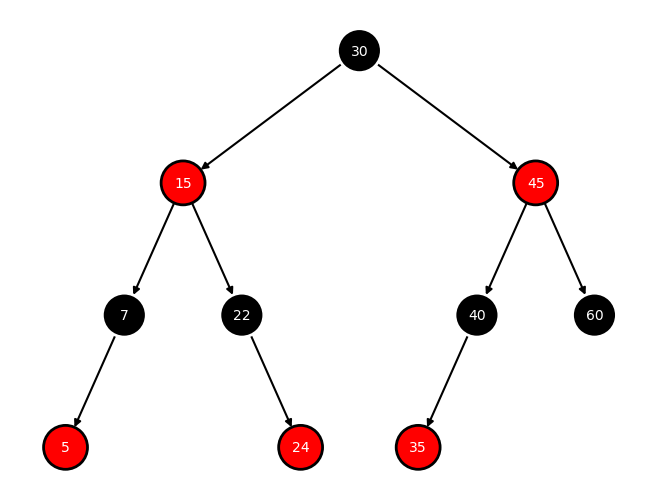

In [8]:
"""
Estruturas de Dados Não-Lineares
    
        Árvores
            
            Árvore Vermelho-Preto
            
As árvores Vermelho-Preto (Red-Black Trees) são uma forma de 
árvore de busca binária equilibrada. Elas mantêm seu equilíbrio 
através de uma série de rotações e alterações de cor em nós durante 
as operações de inserção e remoção.

Cada nó na árvore tem uma cor (vermelho ou preto) associada a ele, e 
há algumas propriedades que devem ser satisfeitas para a árvore ser 
considerada uma árvore Vermelho-Preto:

    Cada nó é vermelho ou preto.
    A raiz é sempre preta.
    Todos os nós folha (NIL ou nulo) são pretos.
    Se um nó vermelho tem filhos, então os filhos são sempre pretos.
    Cada caminho da raiz a qualquer nó folha contém o mesmo número de nós pretos.

A seguir, está um exemplo simples de implementação de uma Árvore Vermelho-Preto:
"""

# Importa a biblioteca NetworkX, que fornece estruturas de dados 
# para grafos e funções para análise e visualização de grafos.
import networkx as nx

# Importa a biblioteca Matplotlib, que fornece funções para criar visualizações 
# estáticas, animadas e interativas em Python.
import matplotlib.pyplot as plt

# Define uma classe chamada "No", que representa um nó da árvore.
class No:
    
    # O método de inicialização "__init__" é chamado automaticamente quando um
    # novo objeto "No" é criado.
    def __init__(self, dado, cor, pai=None):
        
        # "self" é uma referência ao objeto instância atual da classe e é 
        # usado para acessar as variáveis que pertencem à classe.

        # Atribui o valor passado como argumento "dado" para o atributo "dado" do nó.
        # Este atributo armazenará o valor contido no nó.
        self.dado = dado
        
        # Atribui o valor passado como argumento "cor" para o atributo "cor" do nó.
        # Este atributo determinará a cor do nó (geralmente usado em árvores 
        # Rubro-Negras para indicar se um nó é vermelho ou preto).
        self.cor = cor
        
        # Atribui o valor passado como argumento "pai" para o atributo "pai" do nó.
        # Este atributo mantém uma referência ao nó pai do nó atual.
        # O valor padrão é "None", indicando que, por padrão, um nó não tem pai a 
        # menos que especificado.
        self.pai = pai
        
        # Define o atributo "esquerda" como "None".
        # Este atributo manterá uma referência ao filho esquerdo do nó atual.
        self.esquerda = None
        
        # Define o atributo "direita" como "None".
        # Este atributo manterá uma referência ao filho direito do nó atual.
        self.direita = None
        
        
# Define uma classe chamada "ArvoreVermelhoPreto", que representa uma árvore Rubro-Negra.
# Árvores Rubro-Negras são árvores binárias de busca auto-balanceadas, onde cada 
# nó tem uma cor (vermelho ou preto).
# Elas mantêm o equilíbrio ao pintar cada nó de uma das duas cores e garantem que
# a árvore satisfaça certas propriedades coloridas.
class ArvoreVermelhoPreto:
    
    # O método de inicialização "__init__" é chamado automaticamente quando um 
    # novo objeto "ArvoreVermelhoPreto" é criado.
    def __init__(self):
        
        # "self" é uma referência ao objeto instância atual da classe e é usado 
        # para acessar as variáveis que pertencem à classe.
        
        # Define o atributo "raiz" como "None".
        # A "raiz" é o ponto de partida da árvore. Quando a árvore é criada, ela está 
        # vazia, portanto, a raiz é "None".
        self.raiz = None
        
        
    # Define um método privado chamado "_rotacao_esquerda".
    # A rotação à esquerda é uma operação fundamental para manter 
    # a árvore Rubro-Negra balanceada após inserções e remoções.
    def _rotacao_esquerda(self, no):

        # Armazena o nó filho à direita do nó atual em uma variável temporária chamada "temp".
        # O nó à direita será movido para a posição do nó atual após a rotação.
        temp = no.direita

        # Atualiza o filho direito do nó atual para ser o filho esquerdo de "temp".
        no.direita = temp.esquerda

        # Se o filho esquerdo de "temp" existir, atualiza o pai desse filho para ser o nó atual.
        if temp.esquerda:
            temp.esquerda.pai = no

        # Atualiza o pai do nó "temp" para ser o pai do nó atual.
        temp.pai = no.pai

        # Se o nó atual não tiver um pai (ou seja, se for a raiz da árvore),
        # atualiza a raiz da árvore para ser "temp".
        if not no.pai:
            self.raiz = temp
            
        # Se o nó atual for o filho esquerdo de seu pai, atualiza o filho
        # esquerdo do pai para ser "temp".
        elif no == no.pai.esquerda:
            no.pai.esquerda = temp
            
        # Caso contrário, o nó atual deve ser o filho direito de 
        # seu pai, então atualiza o filho direito do pai para ser "temp".
        else:
            no.pai.direita = temp

        # Define o filho esquerdo de "temp" para ser o nó atual.
        temp.esquerda = no

        # Atualiza o pai do nó atual para ser "temp".
        no.pai = temp
        
        
    # Define um método privado chamado "_rotacao_direita".
    # A rotação à direita é outra operação fundamental para 
    # manter a árvore Rubro-Negra balanceada após inserções e remoções.
    def _rotacao_direita(self, no):

        # Captura o filho à esquerda do nó atual e o armazena em uma 
        # variável temporária chamada "temp".
        # Isso porque, na rotação à direita, o filho esquerdo atual do nó 
        # será movido para a posição do nó original.
        temp = no.esquerda

        # Atualiza o filho esquerdo do nó atual para ser o filho direito de "temp".
        # Esta ação desloca o filho direito do nó que estamos rotacionando (temp) para
        # a esquerda do nó atual.
        no.esquerda = temp.direita

        # Se o filho direito de "temp" existir, atualiza o pai
        # desse filho para apontar para o nó atual.
        # Isso garante que o nó direito de "temp" conheça seu novo 
        # pai após a rotação.
        if temp.direita:
            temp.direita.pai = no

        # Atualiza o pai do nó "temp" para ser o pai do nó atual.
        # Isso garante que "temp" tenha o mesmo pai que o nó original tinha antes da rotação.
        temp.pai = no.pai

        # Se o nó atual não tiver um pai (ou seja, se ele for a raiz da árvore),
        # atualiza a raiz da árvore para ser "temp" pois após a 
        # rotação, "temp" ocupará a posição do nó original.
        if not no.pai:
            self.raiz = temp
            
        # Se o nó atual for o filho esquerdo de seu pai, atualiza o 
        # filho esquerdo do pai para ser "temp".
        # Isso garante que o pai do nó original aponte para "temp" após a rotação.
        elif no == no.pai.esquerda:
            no.pai.esquerda = temp
            
        # Caso contrário, o nó atual deve ser o filho direito de seu pai. 
        # Nesse caso, atualiza o filho direito do pai para ser "temp".
        else:
            no.pai.direita = temp

        # Agora, movemos o nó original (que estava acima de "temp") para a direita de "temp".
        temp.direita = no

        # Finalmente, atualiza o pai do nó original para ser "temp", completando a rotação.
        no.pai = temp
        
        
    # Define o método "inserir" que é responsável por inserir um novo
    # valor na árvore Rubro-Negra.
    def inserir(self, valor):

        # Se a árvore está vazia (i.e., não possui uma raiz).
        if not self.raiz:
            
            # Cria um novo nó com o valor fornecido e define sua cor como "preto".
            # A raiz de uma árvore Rubro-Negra deve sempre ser preta.
            self.raiz = No(valor, "preto")
            
        else:
            
            # Se a árvore não está vazia, chama o método auxiliar "_inserir" 
            # para inserir o valor na posição correta.
            self._inserir(self.raiz, valor)

            # Após inserir o novo valor, chama o método "balancear" para garantir 
            # que a árvore continue obedecendo as propriedades Rubro-Negras.
            # O balanceamento começa a partir da raiz.
            self.balancear(self.raiz)
            
            
    # Define o método "balancear", que ajusta a cor dos nós e realiza rotações para
    # manter as propriedades da árvore Rubro-Negra após a inserção.
    def balancear(self, no):

        # Inicia um loop que continuará enquanto o nó possuir um 
        # pai e a cor do pai for vermelha.
        # Isso ocorre porque inserir um nó vermelho sob outro nó 
        # vermelho viola as propriedades da árvore Rubro-Negra.
        while no.pai and no.pai.cor == "vermelho":

            # Se o pai do nó atual for o filho esquerdo de seu avô.
            if no.pai == no.pai.pai.esquerda:

                # O tio é definido como o filho direito do avô.
                tio = no.pai.pai.direita

                # Se o tio existe e sua cor é vermelha.
                if tio and tio.cor == "vermelho":
                    
                    # Altera a cor do pai e do tio para preto e a cor do avô para vermelho.
                    # Essa re-coloração move a violação Rubro-Negra para cima na árvore.
                    no.pai.cor = "preto"
                    tio.cor = "preto"
                    no.pai.pai.cor = "vermelho"

                    # Atualiza o nó para o avô e continua o loop.
                    no = no.pai.pai
                    
                else:
                    
                    # Se o nó for o filho direito do pai.
                    if no == no.pai.direita:
                        
                        # Atualiza o nó para o pai e realiza uma rotação à esquerda no nó.
                        no = no.pai
                        self._rotacao_esquerda(no)

                    # Altera a cor do pai para preto e a cor do avô para vermelho.
                    no.pai.cor = "preto"
                    no.pai.pai.cor = "vermelho"

                    # Realiza uma rotação à direita no avô.
                    self._rotacao_direita(no.pai.pai)

            # Caso o pai do nó atual seja o filho direito de seu
            # avô (caso simétrico ao anterior).
            else:
                
                # O tio é definido como o filho esquerdo do avô.
                tio = no.pai.pai.esquerda

                # Se o tio existe e sua cor é vermelha.
                if tio and tio.cor == "vermelho":
                    
                    # Altera a cor do pai e do tio para preto e a cor do avô para vermelho.
                    no.pai.cor = "preto"
                    tio.cor = "preto"
                    no.pai.pai.cor = "vermelho"

                    # Atualiza o nó para o avô e continua o loop.
                    no = no.pai.pai
                    
                else:
                    
                    # Se o nó for o filho esquerdo do pai.
                    if no == no.pai.esquerda:
                        
                        # Atualiza o nó para o pai e realiza uma rotação à direita no nó.
                        no = no.pai
                        self._rotacao_direita(no)

                    # Altera a cor do pai para preto e a cor do avô para vermelho.
                    no.pai.cor = "preto"
                    no.pai.pai.cor = "vermelho"

                    # Realiza uma rotação à esquerda no avô.
                    self._rotacao_esquerda(no.pai.pai)

        # Garante que a raiz da árvore seja sempre preta, conforme a 
        # propriedade da árvore Rubro-Negra.
        self.raiz.cor = "preto"
            
            
    # Define o método "_inserir" que é um método auxiliar para a inserção 
    # de um novo valor na árvore Rubro-Negra.
    def _inserir(self, no_atual, valor):

        # Verifica se o valor a ser inserido é menor que o dado no nó atual.
        if valor < no_atual.dado:
            
            # Se o nó atual tem um filho à esquerda.
            if no_atual.esquerda:
                
                # Faz uma chamada recursiva ao método "_inserir" para 
                # continuar a busca pela posição correta para inserção na subárvore esquerda.
                self._inserir(no_atual.esquerda, valor)
                
            else:
                
                # Se o nó atual não tem um filho à esquerda, cria um novo nó 
                # com o valor fornecido e cor "vermelho",
                # e define este nó como filho esquerdo do nó atual.
                no_atual.esquerda = No(valor, "vermelho", no_atual)

                # Chama o método "balancear" para garantir que a subárvore esquerda
                # continue obedecendo as propriedades Rubro-Negras após a inserção.
                self.balancear(no_atual.esquerda)
            
            
        # Verifica se o valor a ser inserido é maior que o dado no nó atual.
        elif valor > no_atual.dado:
            
            # Se o nó atual tem um filho à direita.
            if no_atual.direita:
                
                # Faz uma chamada recursiva ao método "_inserir" para continuar 
                # a busca pela posição correta para inserção na subárvore direita.
                self._inserir(no_atual.direita, valor)
                
            else:
                
                # Se o nó atual não tem um filho à direita, cria um novo 
                # nó com o valor fornecido e cor "vermelho",
                # e define este nó como filho direito do nó atual.
                no_atual.direita = No(valor, "vermelho", no_atual)

                # Chama o método "balancear" para garantir que a subárvore
                # direita continue obedecendo as propriedades Rubro-Negras após a inserção.
                self.balancear(no_atual.direita)
        
    
# Define a função 'adicionar_ao_grafo' que é uma função auxiliar para 
# adicionar nós e arestas de uma árvore Rubro-Negra a um grafo do NetworkX.
def adicionar_ao_grafo(no, G):
    
    # Verifica se o nó passado como argumento não é None.
    # Isso serve para garantir que a função não tente adicionar nós vazios ao grafo.
    if no is not None:
        
        # Adiciona o nó atual ao grafo 'G'. A cor e o valor do nó são armazenados
        # como atributos do nó no grafo.
        G.add_node(no, color=no.cor, valor=no.dado)
        
        # Verifica se o nó atual tem um nó pai.
        if no.pai:
            
            # Se tiver, adiciona uma aresta entre o nó pai e o nó atual ao grafo 'G'.
            G.add_edge(no.pai, no)
        
        # Chama a função 'adicionar_ao_grafo' recursivamente para o 
        # filho esquerdo do nó atual.
        adicionar_ao_grafo(no.esquerda, G)
        
        # Chama a função 'adicionar_ao_grafo' recursivamente para o 
        # filho direito do nó atual.
        adicionar_ao_grafo(no.direita, G)
        
        
# Define a função 'converter_cores_para_ingles' que converte uma lista de
# cores do português para o inglês.
def converter_cores_para_ingles(cores):

    # Cria um dicionário para mapear as cores do português para o inglês.
    # A chave do dicionário é a cor em português e o valor correspondente é a 
    # tradução para o inglês.
    mapeamento_cores = {
        "preto": "black",    # Mapeia "preto" para "black"
        "vermelho": "red"    # Mapeia "vermelho" para "red"
    }

    # Usa uma compreensão de lista para criar uma nova lista.
    # Para cada cor na lista 'cores' fornecida como argumento, o valor 
    # correspondente no dicionário 'mapeamento_cores' é obtido.
    # O resultado é uma nova lista de cores traduzidas para o inglês.
    return [mapeamento_cores[cor] for cor in cores]


# Inicializa uma variável global 'ordem_no' para manter a ordem 
# dos nós conforme são visitados.
ordem_no = 0


# Define a função 'calcular_posicoes' que calcula as posições x e y 
# de cada nó em uma árvore binária para visualização gráfica.
def calcular_posicoes(raiz, pos={}, y=0):
    
    # Usa a palavra-chave 'global' para indicar que estamos nos 
    # referindo à variável global 'ordem_no' e não criando uma nova.
    global ordem_no

    # Verifica se o nó atual (raiz) é válido.
    if raiz is not None:

        # Primeiro, visita a subárvore à esquerda do nó atual (travessia em ordem).
        calcular_posicoes(raiz.esquerda, pos, y - 1)

        # Atribui a posição (x, y) ao nó atual:
        # x é baseado na ordem em que o nó é visitado (ordem_no).
        # y é baseado na profundidade do nó na árvore (quanto mais
        # profundo, menor o valor de y).
        pos[raiz] = (ordem_no, y)

        # Incrementa a ordem do nó para que o próximo nó visitado tenha um valor x maior.
        ordem_no += 1

        # Por último, visita a subárvore à direita do nó atual.
        calcular_posicoes(raiz.direita, pos, y - 1)

    # Retorna o dicionário 'pos', que mapeia cada nó para sua posição (x, y).
    return pos
        
        
        
# Define a função 'desenhar_arvore' que visualiza uma árvore Vermelho-Preto.
def desenhar_arvore(arvore):

    # Cria um grafo direcionado usando a biblioteca NetworkX.
    G = nx.DiGraph()

    # Chama a função 'adicionar_ao_grafo' para adicionar nós e arestas ao
    # grafo G a partir da árvore fornecida.
    adicionar_ao_grafo(arvore.raiz, G)

    # Coleta as cores de fundo de cada nó no grafo, usando atributos do nó.
    # cores_fundo = [nx.get_node_attributes(G, 'color')[no] for no in G.nodes()]
    
    # Inicializa uma lista vazia chamada cores_fundo para armazenar as cores de fundo dos nós.
    cores_fundo = []

    # Itera sobre todos os nós do grafo G.
    for no in G.nodes():

        # Para cada nó, obtém o atributo 'color' usando a função nx.get_node_attributes
        # e acessa a cor do nó atual usando [no].
        cor = nx.get_node_attributes(G, 'color')[no]

        # Adiciona a cor do nó atual à lista cores_fundo.
        cores_fundo.append(cor)


    # Converte as cores de fundo de português para inglês usando a função
    # 'converter_cores_para_ingles'.
    cores_fundo = converter_cores_para_ingles(cores_fundo)

    # Define as cores de borda dos nós com base na cor de fundo (nós pretos 
    # têm borda branca e nós vermelhos têm borda preta).
    # cores_borda = ['white' if cor == 'black' else 'black' for cor in cores_fundo]
    
    # Inicializa uma lista vazia chamada cores_borda para armazenar as cores de borda dos nós.
    cores_borda = []

    # Itera sobre cada cor na lista cores_fundo.
    for cor in cores_fundo:

        # Verifica se a cor atual é 'black' (preto).
        if cor == 'black':

            # Se a cor do nó for 'black', define a cor da borda como 'white' (branco).
            cores_borda.append('white')
            
        else:

            # Se a cor do nó não for 'black', define a cor da borda como 'black' (preto).
            cores_borda.append('black')


    # Calcula as posições dos nós na visualização usando a função 'calcular_posicoes'.
    pos = calcular_posicoes(arvore.raiz)

    # Desenha o grafo usando a biblioteca NetworkX.
    # Define várias propriedades visuais, como cores de nó, tamanho do nó, cor da aresta, etc.
    # nx.draw(G, pos, with_labels=False, node_color=cores_fundo, node_size=1000, edge_color='black', width=1.5, edgecolors=cores_borda, linewidths=2)
    nx.draw(
        G,                                  # O grafo a ser desenhado.
        pos,                                # Um dicionário com as posições dos nós. As chaves são os nós e os valores são as coordenadas (x, y).
        with_labels=False,                   # Especifica se os nós devem ser rotulados com seus identificadores (neste caso, não).
        node_color=cores_fundo,              # Define as cores de fundo dos nós, baseado na lista cores_fundo.
        node_size=1000,                      # Define o tamanho dos nós. Neste caso, cada nó terá um tamanho de 1000.
        edge_color='black',                  # Define a cor das arestas (linhas que conectam os nós) como preta.
        width=1.5,                           # Define a espessura das arestas. Neste caso, cada aresta terá uma espessura de 1.5.
        edgecolors=cores_borda,              # Define as cores das bordas dos nós, baseado na lista cores_borda.
        linewidths=2                        # Define a espessura da linha da borda ao redor de cada nó como 2.
    )

    
    # Para cada nó, exibe o valor do nó na posição calculada.
    # A cor do texto é branca para nós pretos e preta para nós vermelhos.
    # for no, (x, y) in pos.items():
    #    plt.text(x, y, str(no.dado), ha='center', va='center', color='white' if G.nodes[no]['color'] == 'preto' else 'black')
    
    # Iterando sobre os itens do dicionário 'pos', que contém as posições (x, y) de cada nó.
    for no, (x, y) in pos.items():

        # plt.text é usado para adicionar um texto em um gráfico do Matplotlib.
        # Neste caso, estamos adicionando o valor 'dado' de cada nó na sua respectiva posição (x, y).

        plt.text(
            x, y,                            # Coordenadas (x, y) onde o texto será posicionado.
            str(no.dado),                    # O texto a ser exibido. Aqui, estamos convertendo o atributo 'dado' do nó para string.
            ha='center',                     # Alinhamento horizontal do texto. 'center' significa que o texto será centralizado em relação à coordenada x.
            va='center',                     # Alinhamento vertical do texto. 'center' significa que o texto será centralizado em relação à coordenada y.

            # Definindo a cor do texto. Se a cor do nó for 'preto', o texto será 'white'. Caso contrário, será 'white'.
            color='white' if G.nodes[no]['color'] == 'preto' else 'white'
        )

    
    # Exibe a visualização da árvore.
    plt.show()
            

# Cria uma instância da classe ArvoreVermelhoPreto.
arvore = ArvoreVermelhoPreto()

# Define uma lista de valores que serão inseridos na árvore.
valores = [30, 15, 45, 7, 22, 40, 60, 5, 24, 35]
# valores = [50, 25, 75, 12, 37, 62, 87, 6, 18, 30, 42, 55, 68, 80, 92]

# valores = [
#    150, 75, 225, 37, 112, 187, 262, 18, 56, 94, 131, 168, 206, 243, 281,
#    9, 28, 45, 67, 84, 103, 120, 140, 157, 284
#]

# Para cada valor na lista 'valores', insere o valor na árvore.
for valor in valores:
    arvore.inserir(valor)
    

# Chama a função 'desenhar_arvore' para visualizar a árvore Vermelho-Preto.
# A função usa a biblioteca NetworkX para criar um grafo e a biblioteca Matplotlib 
# para desenhar e exibir a visualização.
desenhar_arvore(arvore)
            
"""
Em uma árvore vermelho e preto (RBT, Red-Black Tree), a cor de um nodo (seja ele vermelho
ou preto) é determinada por uma série de propriedades que a árvore deve manter a cada inserção
ou remoção. Estas propriedades garantem que a árvore permaneça aproximadamente equilibrada, 
resultando em tempos de busca, inserção e remoção eficientes.

As propriedades básicas de uma árvore vermelho e preto são:

- Cada nodo é ou vermelho ou preto.
- A raiz é sempre preta.
- Se um nodo é vermelho, então ambos os seus filhos são pretos.
- Todo caminho da raiz para um nodo NIL ou nulo contém o mesmo número de nodos pretos.
- Novos inserções são sempre nodos vermelhos.

A raiz da árvore (o primeiro valor, 150) seria preto devido ser a raiz. Quanto aos 
outros valores, a cor (preto ou vermelho) dependeria da sequência de inserções e das 
rotações necessárias para manter as propriedades da árvore vermelho e preto.

Os três primeiros nodos são pretos, é provável que a ordem e o método de inserção levaram a 
essa configuração para manter as propriedades da RBT.
"""
print()

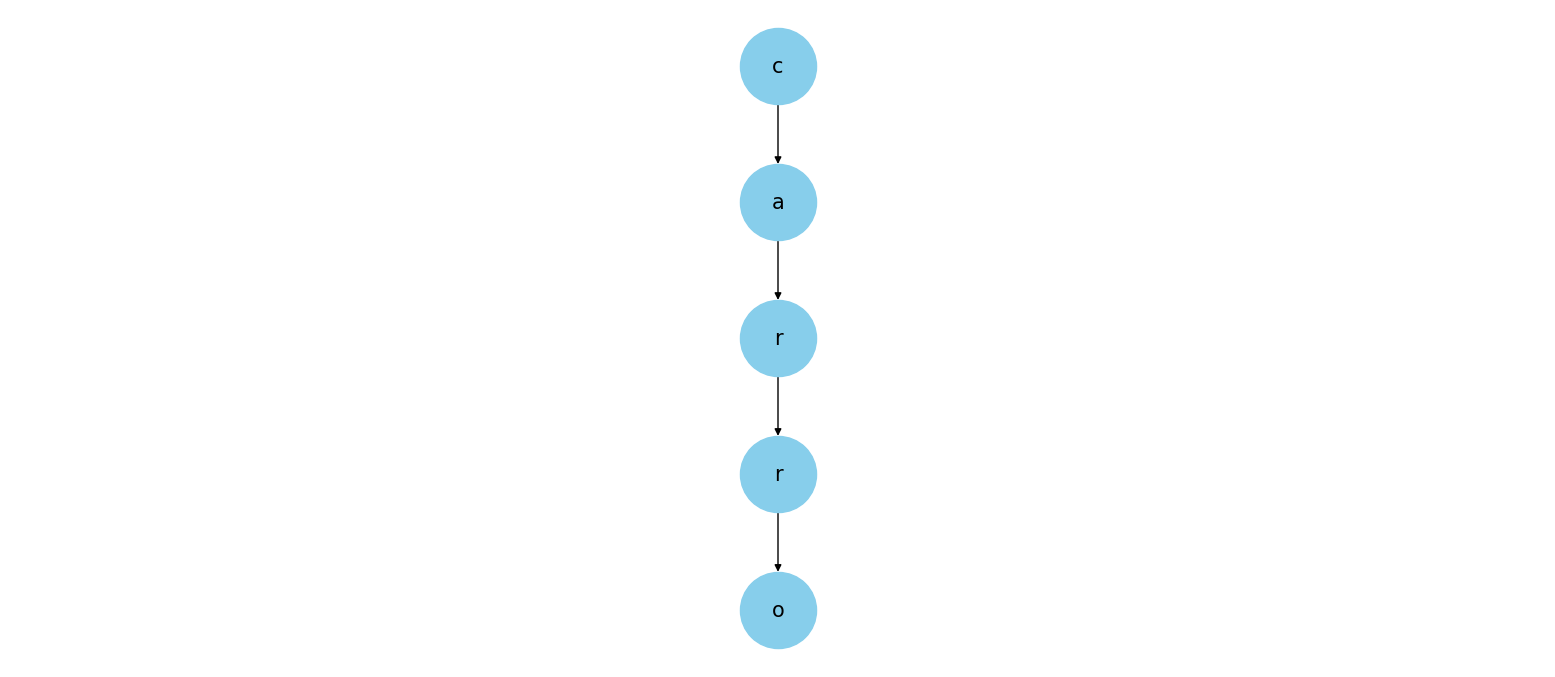

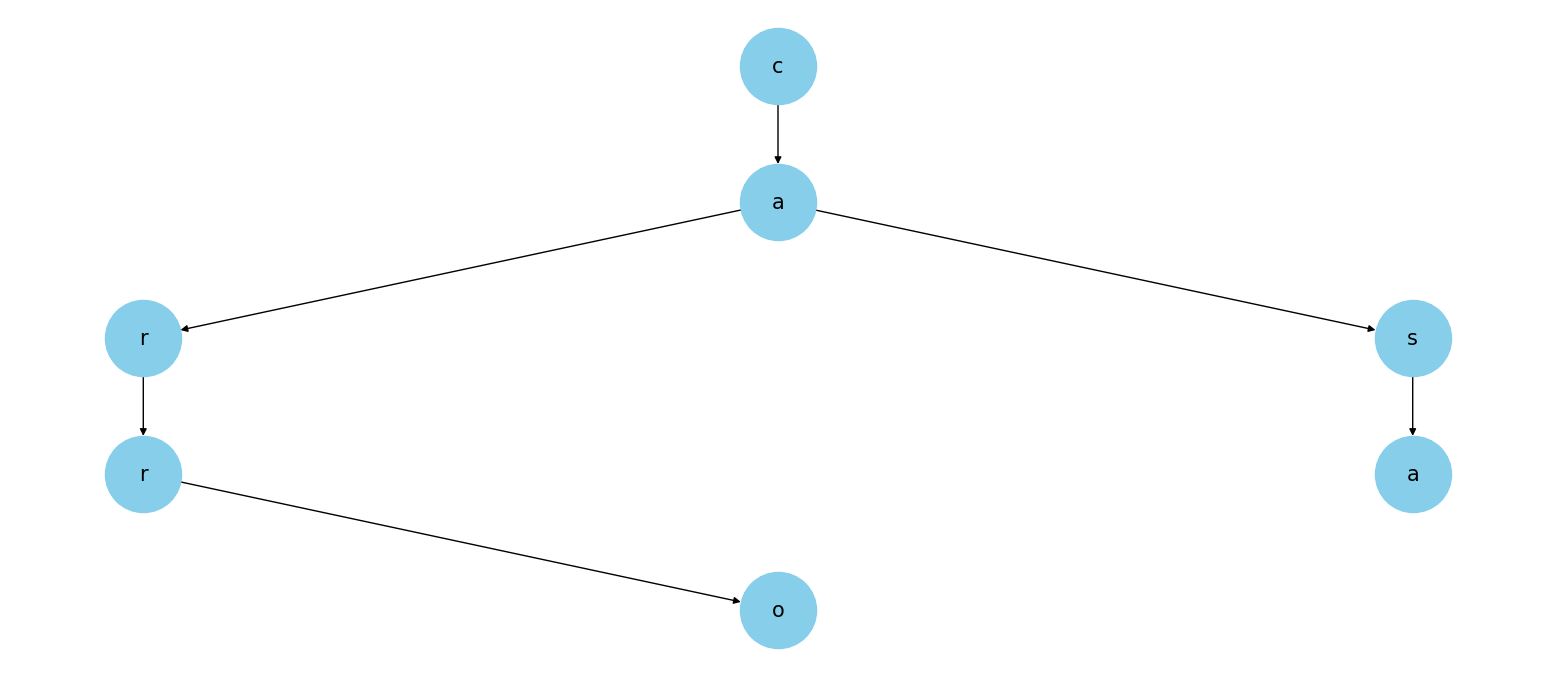

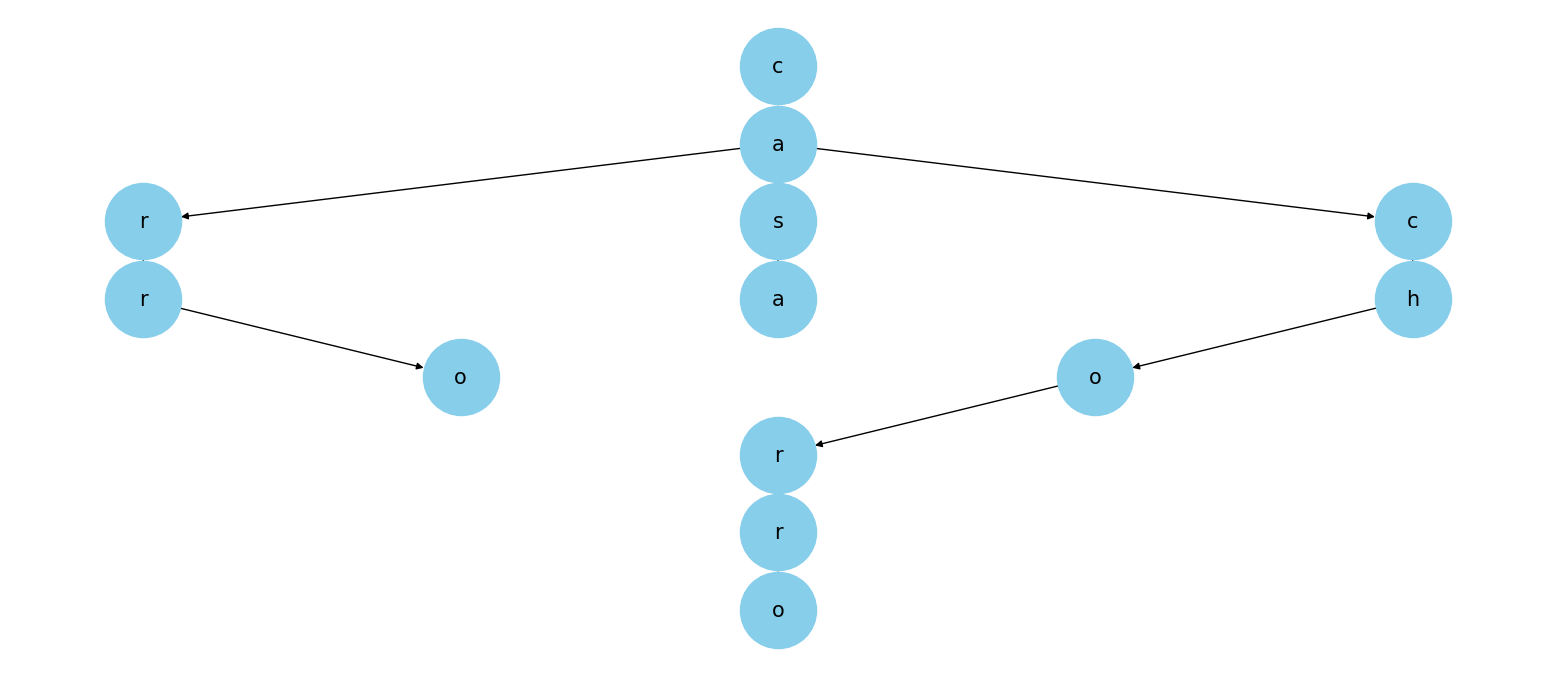

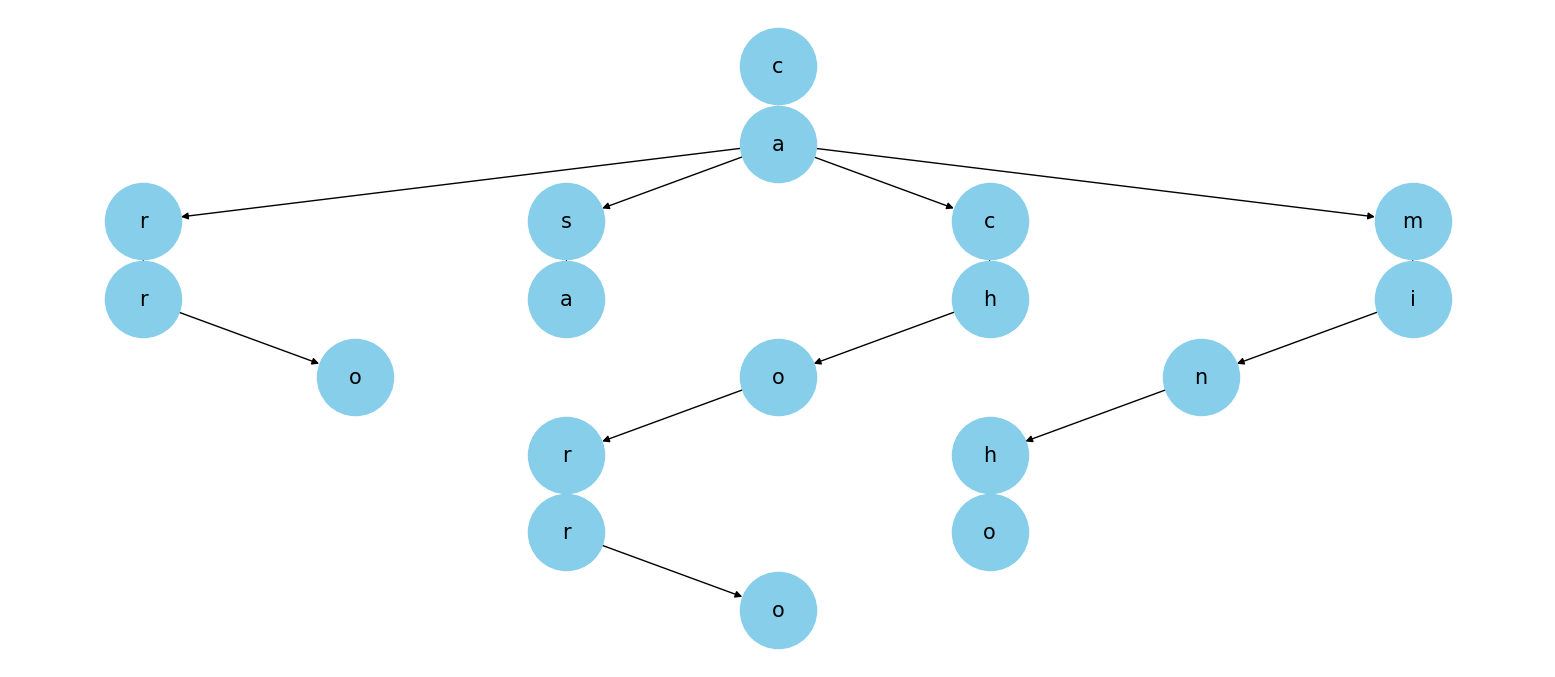

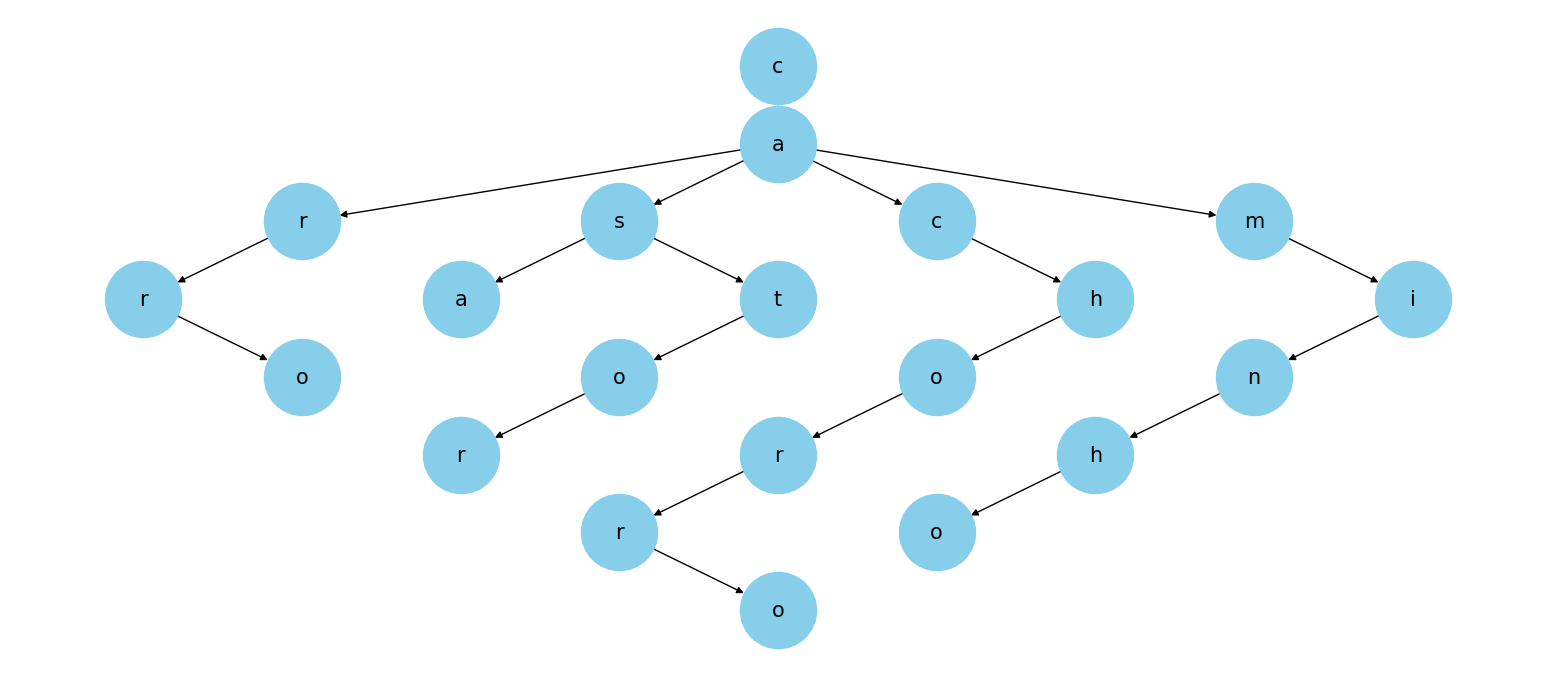

In [13]:
"""
Estruturas de Dados Não-Lineares
    
        Árvores
            
            Trie
            
 Uma Trie é uma árvore de prefixos, onde cada caminho da raiz
 a um nó representa um prefixo da coleção de palavras. Se duas 
 palavras possuem um prefixo comum, elas compartilharão o mesmo
 caminho na Trie até o fim desse prefixo.

Por exemplo, se inserirmos as palavras "carro" e "casa" 
na Trie, a estrutura da Trie será:

raiz
 |
 c
 |
 a
 |\
 | s
 |  \
 r   a
 |
 r
 |
 o


"""

# Importando a biblioteca tkinter, que é usada para criar interfaces gráficas.
import tkinter as tk

# Importando o módulo ttk do tkinter, que fornece acesso a um conjunto de widgets temáticos.
from tkinter import ttk

# Importando a biblioteca networkx, que é usada para criar, manipular 
# e estudar a estrutura e funções de grafos complexos.
import networkx as nx

# Importando a biblioteca matplotlib, que é uma biblioteca de plotagem 2D em Python.
import matplotlib.pyplot as plt

# Importando FigureCanvasTkAgg do backend do matplotlib para integrar gráficos 
# do matplotlib em aplicações Tkinter.
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg


# Definindo uma classe chamada NoTrie para representar um nó na Trie.
class NoTrie:
    
    # O construtor da classe, que é chamado quando um novo objeto NoTrie é criado.
    def __init__(self):
        
        # Inicializando um dicionário para os filhos do nó. Cada chave é um 
        # caractere e o valor é outro NoTrie.
        self.filhos = {}
        
        # Inicializando uma variável booleana para verificar se o nó atual 
        # marca o fim de uma palavra na Trie.
        self.eh_fim_palavra = False
        

# Definindo uma classe chamada Trie para representar a estrutura de dados Trie.
class Trie:
    
    # O construtor da classe, que é chamado quando um novo objeto Trie é criado.
    def __init__(self):
        
        # Inicializando a raiz da Trie com um novo nó NoTrie.
        # A raiz da Trie é um nó especial que não contém nenhum caractere/palavra.
        self.raiz = NoTrie()

    # Método para inserir uma palavra na Trie.
    def inserir(self, palavra):
        
        # Começando da raiz da Trie.
        no = self.raiz
        
        # Iterando sobre cada caractere da palavra.
        for char in palavra:
            
            # Verificando se o caractere atual não é um filho do nó atual.
            # Se não for, criamos um novo nó NoTrie e o adicionamos ao 
            # dicionário de filhos.
            if char not in no.filhos:
                no.filhos[char] = NoTrie()
            
            # Movendo para o próximo nó (ou seja, o filho que representa
            # o caractere atual).
            no = no.filhos[char]
        
        # Após iterar por todos os caracteres, marcamos o último nó 
        # como o fim da palavra.
        no.eh_fim_palavra = True
        
        
# A classe AppTrie é uma extensão de tk.Tk, que é a janela principal do Tkinter.
# Isso significa que nossa classe AppTrie não é apenas um aplicativo padrão, mas
# também uma janela principal do Tkinter,
# com todos os recursos e funcionalidades de uma janela Tkinter.
class AppTrie(tk.Tk):
    
    # O método __init__ é o construtor da classe. Ele é chamado 
    # automaticamente quando um objeto da classe é criado.
    def __init__(self):
        
        # A função super() retorna um objeto temporário da classe 
        # base, que neste caso é tk.Tk.
        # Estamos chamando o método __init__ da classe base para 
        # garantir que a janela principal do Tkinter seja inicializada corretamente.
        super().__init__()

        # Criamos uma instância da estrutura de dados Trie, que será 
        # usada para inserir e consultar palavras.
        self.trie = Trie()
        
        # O método title() é usado para definir o título da janela. Neste caso, 
        # a janela terá o título "Árvore Trie".
        self.title("Árvore Trie")

        # ttk.Entry é um widget que permite ao usuário inserir uma única linha de texto.
        # Estamos criando uma caixa de entrada e associando-a à janela principal (self).
        self.entrada = ttk.Entry(self, font=("Arial 20"))
        
        # O método pack() é usado para organizar widgets na janela. 
        # pady=20 adiciona um espaço vertical de 20 pixels acima e abaixo 
        # da caixa de entrada.
        self.entrada.pack(pady=20)
        
        # ttk.Button é um widget que cria um botão. 
        # O texto no botão é "Inserir" e, quando o botão for 
        # clicado, a função self.inserir_e_mostrar será executada.
        self.botao_inserir = ttk.Button(self, 
                                        text="Inserir", 
                                        command=self.inserir_e_mostrar)
        
        # Organizamos o botão na janela, assim como fizemos com a caixa de entrada.
        self.botao_inserir.pack(pady=20)
        
        
        # ttk.Frame cria um container retangular que pode conter outros widgets.
        # Estamos criando esse frame para posteriormente adicionar um gráfico visual da Trie.
        self.canvas_frame = ttk.Frame(self)
        
        # Adicionando o frame à janela principal. 
        # fill=tk.BOTH faz com que o frame se expanda tanto vertical 
        # quanto horizontalmente para preencher qualquer espaço disponível.
        # expand=True garante que, se a janela principal for redimensionada, 
        # o frame também será, ocupando todo o espaço disponível.
        self.canvas_frame.pack(fill=tk.BOTH, expand=True)
        
        
    # Definindo o método 'inserir_e_mostrar' para a classe 'AppTrie'.
    # Este método é responsável por pegar a palavra inserida pelo usuário e, 
    # em seguida, inseri-la na Trie e visualizá-la.
    def inserir_e_mostrar(self):
        
        # Usando o método 'get' do widget 'Entry' para obter a palavra/string 
        # que o usuário digitou na caixa de entrada.
        palavra = self.entrada.get()
        
        # Verificando se a palavra obtida não está vazia. 
        # Se a caixa de entrada estiver vazia, 'palavra' será uma string vazia, 
        # que é avaliada como 'False' em uma condição.
        if palavra:
            
            # Chamando o método 'inserir' da instância 'trie' para adicionar
            # a palavra à Trie.
            self.trie.inserir(palavra)
            
            # Chamando o método 'mostrar_arvore' para atualizar a visualização 
            # gráfica da Trie.
            self.mostrar_arvore()
            
    # Definindo o método 'mostrar_arvore' para a classe 'AppTrie'.
    # Este método é responsável por criar uma visualização gráfica da Trie.
    def mostrar_arvore(self):
        
        # Criando um grafo direcionado usando a biblioteca 'networkx'.
        # A Trie é uma forma de árvore/grafos, e 'DiGraph' representa 
        # um grafo direcionado.
        G = nx.DiGraph()
        
        # Inicializando um dicionário vazio para armazenar os rótulos dos nós.
        # Cada nó terá um rótulo, que é o caractere da Trie que ele representa.
        labels = {}
        
        # Inicializando um dicionário vazio para armazenar as posições dos 
        # nós quando desenharmos o grafo.
        posicoes = {}
        
        # Inicializando um dicionário vazio para armazenar os nós por nível.
        # Isso nos ajudará a determinar a posição y de cada nó.
        niveis = {}

        # Definindo uma função interna chamada 'visitar_no' para percorrer a Trie.
        # Esta função será chamada recursivamente para cada nó da Trie.
        def visitar_no(no, parent_name, caminho_atual, nivel):
            
            # Iterando sobre cada filho do nó atual.
            for char, filho_no in no.filhos.items():
                
                # Criando um nome único para o nó com base no caminho da raiz até ele.
                nome_no = caminho_atual + char
                
                # Adicionando uma aresta ao grafo do nó pai para o nó filho.
                G.add_edge(parent_name, nome_no)
                
                # Definindo o rótulo do nó filho como o caractere que ele representa.
                labels[nome_no] = char
                
                # Verificando se o nível atual já tem uma entrada no dicionário de níveis.
                if nivel not in niveis:
                    niveis[nivel] = []
                
                # Adicionando o nome do nó à lista de nós no nível atual.
                niveis[nivel].append(nome_no)
                
                # Chamando a função 'visitar_no' recursivamente para o nó filho.
                # Isso percorrerá todos os descendentes do nó filho.
                visitar_no(filho_no, nome_no, nome_no, nivel + 1)
                
        
        # Chamando a função interna 'visitar_no' para iniciar a travessia da Trie.
        # Começamos com a raiz da Trie e definimos os valores 
        # iniciais para 'parent_name', 'caminho_atual' e 'nivel'.
        # 'parent_name' e 'caminho_atual' são strings vazias porque estamos no início.
        # 'nivel' é definido como 1 porque estamos começando da raiz.
        visitar_no(self.trie.raiz, "", "", 1)
        
        
        # Iterando sobre cada nível e seus respectivos nós, armazenados no dicionário 'niveis'.
        for nivel, nos in niveis.items():
            
            # Calculando o total de nós no nível atual.
            total_nos = len(nos)
            
            # Iterando sobre cada nó no nível atual.
            # A função 'enumerate' retorna o índice (idx) e o valor (no) do item enquanto itera.
            for idx, no in enumerate(nos):
                
                # Calculando a posição x do nó.
                # A ideia é distribuir os nós uniformemente ao longo do eixo x.
                # 'idx - total_nos / 2' assegura que os nós sejam centralizados em torno de x=0.
                x = idx - total_nos / 2
                
                # A posição y é simplesmente o negativo do nível, para que os nós 
                # sejam desenhados de cima para baixo.
                y = -nivel
                
                # Armazenando a posição (x, y) do nó no dicionário 'posicoes'.
                posicoes[no] = (x, y)
                
        
        # Verificando se o nó com nome vazio (""), que representa a 
        # raiz, está presente no grafo 'G'.
        # A raiz não possui um valor de caractere associado, então usamos uma 
        # string vazia para representá-la.
        if "" in G:
            
            # Se o nó raiz estiver presente no grafo, removemos esse nó.
            # Isso é feito porque, geralmente, não queremos mostrar a raiz 
            # na visualização, pois ela não tem um valor significativo em si.
            G.remove_node("")
                
        
        # Acessando todos os widgets (elementos gráficos) que são filhos do 'canvas_frame'.
        # 'canvas_frame' é onde colocamos nossa visualização gráfica, e queremos 
        # limpar qualquer visualização anterior antes de desenhar uma nova.
        for widget in self.canvas_frame.winfo_children():
            
            # Destruindo (removendo) cada widget filho do 'canvas_frame'.
            # Isso garante que, quando desenharmos uma nova visualização, a 
            # visualização anterior seja removida e não haja sobreposição.
            widget.destroy()
        
        # Criando uma nova figura usando a biblioteca matplotlib com um tamanho
        # específico de 10x6 polegadas.
        plt.figure(figsize=(10, 6))
        
        # Usando a função 'draw' da biblioteca networkx para desenhar o grafo 'G'.
        # - 'pos=posicoes': define as posições dos nós conforme calculado anteriormente.
        # - 'labels=labels': define os rótulos dos nós conforme determinado anteriormente.
        # - 'with_labels=True': instrui a função a realmente mostrar os rótulos dos nós.
        # - 'node_size=3000': define o tamanho dos nós.
        # - 'node_color='skyblue'': define a cor dos nós.
        # - 'font_size=15': define o tamanho da fonte dos rótulos.
        nx.draw(G, 
                pos=posicoes, 
                labels=labels, 
                with_labels=True, 
                node_size=3000, 
                node_color='skyblue', 
                font_size=15)
        
        # Criando um 'canvas' (área de desenho) para a figura atual do matplotlib na interface do Tkinter.
        # 'plt.gcf()' retorna a figura atual do matplotlib.
        # 'self.canvas_frame' é o widget Tkinter onde queremos exibir o gráfico.
        canvas = FigureCanvasTkAgg(plt.gcf(), self.canvas_frame)
        
        # Desenhando a figura no canvas.
        canvas.draw()
        
        # Integrando o canvas com a interface do Tkinter.
        # 'get_tk_widget()' retorna o widget Tkinter associado ao canvas.
        # 'pack' organiza o widget na janela. 'side=tk.TOP' coloca o widget no topo da janela.
        # 'fill=tk.BOTH' e 'expand=True' garantem que o widget ocupe todo o espaço disponível.
        canvas.get_tk_widget().pack(side=tk.TOP, fill=tk.BOTH, expand=True)
        
        
# Criando uma instância da classe 'AppTrie', o que inicia a interface gráfica.
app = AppTrie()

# Executando o loop principal do Tkinter. 
# 'mainloop()' mantém a janela aberta e escuta eventos, como cliques de botão.
app.mainloop()
        